In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Input, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Reshape, Conv2DTranspose, UpSampling2D
from tensorflow.python.keras.optimizer_v2.adam import Adam
from keras.layers.merge import concatenate

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import time

In [33]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [34]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test  = X_test.reshape(X_test.shape[0],28,28,1)

Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test) 


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [73]:
#la struttura di base della rete che ho scelto di sviluppare è una sequenza di:
# convoluzione -> pooling --> convoluzione --> pooling --> dropout --> BatchNormalization
# la ripeto a piacere e poi riporto i parametri ad uno strato Dense di dimensione 10, come le classi

def spawn_CNN(times, lmbd):
    CNN = Sequential()
    
    for i in range(times):
        CNN.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
        CNN.add(MaxPool2D(pool_size=(2,2)))
        CNN.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
        CNN.add(MaxPool2D(pool_size=(2,2)))
        CNN.add(Dropout(rate=0.25))
        
    CNN.add(Flatten())
    CNN.add(Dense(24,activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    CNN.add(Dropout(rate=0.25))
    CNN.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    CNN.add(Dense(10,activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    opt = SGD(learning_rate=0.01, momentum=0.9)
    CNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return CNN

In [75]:
myCNN = spawn_CNN(1, 0.001)
myCNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 24)        5208      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 7, 24)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1176)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 24)               

In [76]:
history = myCNN.fit(X_train, Y_train, batch_size=24, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
2500/2500 [==============================] - 38s 15ms/step - loss: 12877.6963 - accuracy: 0.1099 - val_loss: 7566.4399 - val_accuracy: 0.1135
Epoch 2/10
2500/2500 [==============================] - 36s 15ms/step - loss: 4780.8857 - accuracy: 0.1104 - val_loss: 2779.6770 - val_accuracy: 0.1028
Epoch 3/10
2500/2500 [==============================] - 39s 16ms/step - loss: 1756.8982 - accuracy: 0.1103 - val_loss: 1022.0970 - val_accuracy: 0.1135
Epoch 4/10
2500/2500 [==============================] - 39s 16ms/step - loss: 646.5506 - accuracy: 0.1116 - val_loss: 376.7491 - val_accuracy: 0.1028
Epoch 5/10
2500/2500 [==============================] - 40s 16ms/step - loss: 238.8570 - accuracy: 0.1104 - val_loss: 139.7910 - val_accuracy: 0.1135
Epoch 6/10
2500/2500 [==============================] - 40s 16ms/step - loss: 89.1601 - accuracy: 0.1106 - val_loss: 52.7846 - val_accuracy: 0.1010
Epoch 7/10
2500/2500 [==============================] - 42s 17ms/step - loss: 34.1945 - accurac

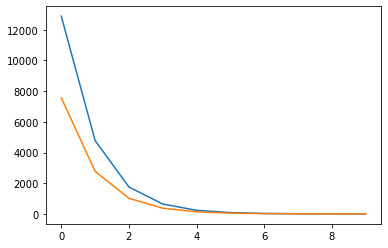

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()